# Novar arvore de decisão para prever se o nosso voo irar atrasar ou não

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [4]:
df = pd.read_csv('airlines_delay.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [6]:
#Massa, sem valores vazios na nossa váriavel

In [7]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [8]:
features =['Flight','Time','Length','DayOfWeek']

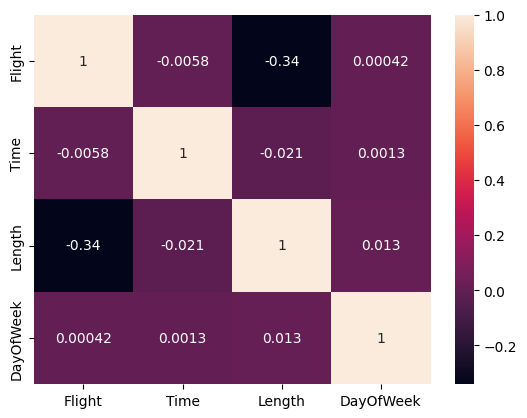

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[features].corr(), annot = True)
plt.show()

In [10]:
#Nenhuma boa correlação

# Agora vamos separar o nosso dataset em treino e teste

In [11]:
X = df[features]
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
y_predict = clf.predict(X_test)

In [15]:
print("Acurancia:",metrics.accuracy_score(y_test, y_predict))

Acurancia: 0.6062231560732936


In [16]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_test.columns,
                class_names=['0','1'])


In [ ]:
graph1=graphviz.Source(dot_data);
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph1